In [2]:
import sys

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
# from matplotlib.pyplot import pie,axis,show

import seaborn as sns
# sns.set(style="whitegrid", font_scale=1.3,color_codes=True)

import  warnings
warnings.filterwarnings("ignore")
import pandas_profiling
plt.rcParams["figure.figsize"]=(10,10)
plt.rcParams["font.size"]=(10)
plt.rcParams["xtick.labelsize"]=(10)
plt.rcParams["ytick.labelsize"]=(10)
plt.rcParams["font.weight"]=("normal")
plt.rcParams['xtick.alignment']="center"
plt.rcParams['ytick.alignment']="center"
plt.rcParams['font.family']="Tahoma"
plt.rcParams['grid.color']="black"
plt.rcParams["grid.alpha"]=True
plt.rcParams["legend.fontsize"]=10
plt.rcParams["legend.title_fontsize"]=10

In [3]:
df=pd.read_csv("EDA Telemarketing.csv")
df

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_code,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2,37.0,Jk,Jk,2302,Male,1
1,9211206,False,5226,74,146,2,37.0,Em,Sh,1501,Male,10
2,8873010,False,4452,35,144,2,37.0,BI,MI,1550,Male,9
3,9852034,False,5461,40,149,2,37.0,WT,LI,1401,Male,6
4,9416548,False,5298,26,147,2,37.0,LA,LA,125,Female,12
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10249682,False,5404,65,150,2,37.0,Iy,Rn,4068,Female,1
99996,8955506,False,5181,37,144,2,37.0,ZA,OE,4450,Female,6
99997,9299394,False,5077,69,146,2,37.0,Wm,Vr,1759,Male,1
99998,9549720,False,5028,67,147,2,37.0,Ze,Ze,1475,Male,1


In [4]:
df.dtypes

Call_ID         int64
Sale           object
Agent_ID       object
Age             int64
Product_ID      int64
Timezone        int64
Phone_code    float64
First_Name     object
Last_Name      object
Area_Code      object
Gender         object
Call_Count      int64
dtype: object

In [5]:
df.isnull().sum()

Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_code      28
First_Name     682
Last_Name      681
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

In [6]:
df.shape

(100000, 12)

In [7]:
df.isnull().sum()

Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_code      28
First_Name     682
Last_Name      681
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

In [8]:
df.isnull().mean()

Call_ID       0.00000
Sale          0.00032
Agent_ID      0.02315
Age           0.00000
Product_ID    0.00000
Timezone      0.00000
Phone_code    0.00028
First_Name    0.00682
Last_Name     0.00681
Area_Code     0.00460
Gender        0.00000
Call_Count    0.00000
dtype: float64

In [ ]:
df.profile_report(title="Pandas Profiling before Processing")

▶ Here in TeleMarketing Data There are <b>4 Numeric,7 Categorical & 1 Boolean Column</b>.<br>
▶ In <b>Phone Code</b> Column only <b>1 Distinct Value.</b><br>
▶ There are Some Columns Which Have <b>Missing(Null)</b> Values like <b>Sale,Agent_ID,First_name,Last_Name,Area_Code</b><br>
▶ We Have To clean the Columns

The <b>Phone_Code & TimeZone </b> Columns Have Only 1 & 2 disticnt Values acoordingly, So we Can drop That Columns

In [9]:
df=df.drop(["Phone_code","Timezone"],axis=1)

In [10]:
df

,Call_ID,Sale,Agent_ID,Age,Product_ID,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,Jk,Jk,2302,Male,1
1,9211206,False,5226,74,146,Em,Sh,1501,Male,10
2,8873010,False,4452,35,144,BI,MI,1550,Male,9
3,9852034,False,5461,40,149,WT,LI,1401,Male,6
4,9416548,False,5298,26,147,LA,LA,125,Female,12
...,...,...,...,...,...,...,...,...,...,...
99995,10249682,False,5404,65,150,Iy,Rn,4068,Female,1
99996,8955506,False,5181,37,144,ZA,OE,4450,Female,6
99997,9299394,False,5077,69,146,Wm,Vr,1759,Male,1
99998,9549720,False,5028,67,147,Ze,Ze,1475,Male,1


From <b>First_Name & Last_Name</b> Column we can not get any type of Informtaion, So we can <b>drop</b> it

In [11]:
df=df.drop(["First_Name","Last_Name"],axis=1)

In [12]:
df

,Call_ID,Sale,Agent_ID,Age,Product_ID,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2302,Male,1
1,9211206,False,5226,74,146,1501,Male,10
2,8873010,False,4452,35,144,1550,Male,9
3,9852034,False,5461,40,149,1401,Male,6
4,9416548,False,5298,26,147,125,Female,12
...,...,...,...,...,...,...,...,...
99995,10249682,False,5404,65,150,4068,Female,1
99996,8955506,False,5181,37,144,4450,Female,6
99997,9299394,False,5077,69,146,1759,Male,1
99998,9549720,False,5028,67,147,1475,Male,1


In [13]:
df.isnull().sum()

Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

Here <b>Agent_Id Has 2315 Null</b> values which is Actually <b>Less Than 3 %</b> of Total data so We can drop that Rows

In [14]:
# df["Agent_ID"]=df["Agent_ID"].dropna(inplace=True)


df=df.dropna(subset=["Agent_ID"])

In [15]:
df.isnull().sum()

Call_ID         0
Sale           31
Agent_ID        0
Age             0
Product_ID      0
Area_Code     451
Gender          0
Call_Count      0
dtype: int64

Here In <b>Sale Column 31 Null </b> Value We can Drop It We Can Replcae It by Mode of column

In [16]:
df["Sale"]=df["Sale"].fillna(df["Sale"].mode()[0])

Here In <b>Area_Code Column 451 Null </b> Value We can Drop It We Can Replcae It by Mode of column

In [17]:
df["Area_Code"]=df["Area_Code"].fillna(df["Area_Code"].mode()[0])

In [18]:
df.isnull().sum()

Call_ID       0
Sale          0
Agent_ID      0
Age           0
Product_ID    0
Area_Code     0
Gender        0
Call_Count    0
dtype: int64

In [496]:
df.profile_report(title="Pandas Profiling After Processing")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h4>Now there is Clean Dat For Further Processing</h4>

So Can Go for <b>Univariate</b> Graphs

<h2>Histograms</h2>

In [365]:
df.columns

Index(['Call_ID', 'Sale', 'Agent_ID', 'Age', 'Product_ID', 'Area_Code',
       'Gender', 'Call_Count'],
      dtype='object')

<h4>Histogram of Call_Count</h4>

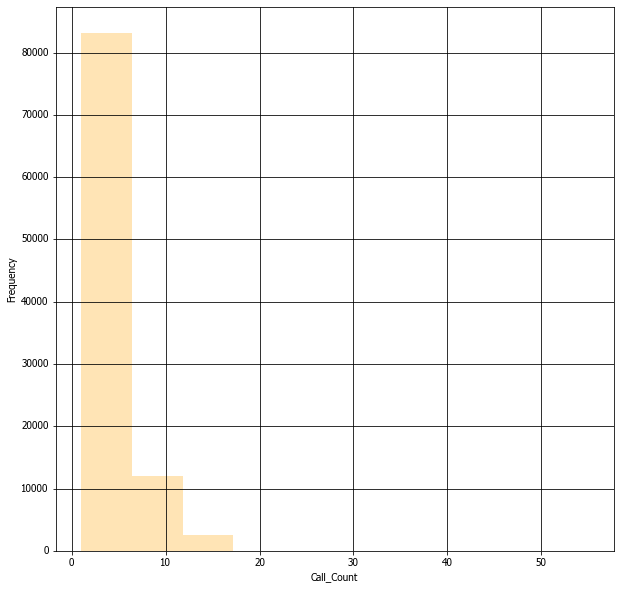

In [474]:
df["Call_Count"].plot(kind="hist",bins=10,color="moccasin",grid=True)
plt.xlabel("Call_Count")
plt.ylabel("Frequency")
plt.grid(color="black");

Most Call_Count Ranges <b>2 to 6</b>

<h4>Histogram of the Age<h/4>

Text(0, 0.5, 'Frequency')

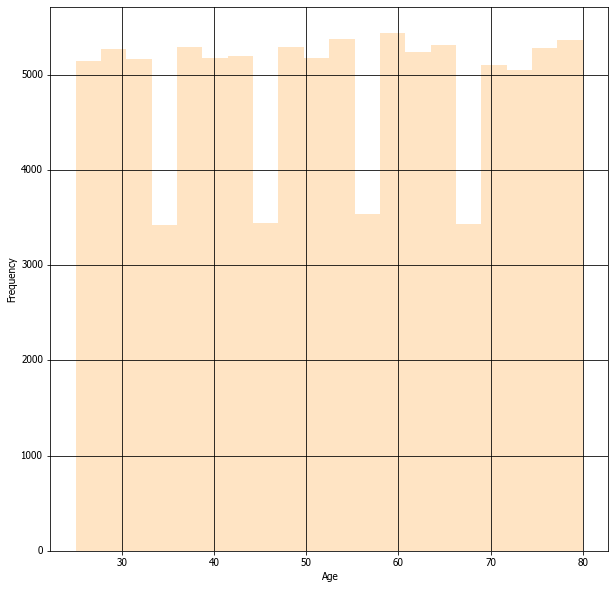

In [475]:
df["Age"].plot(kind="hist",bins=20,grid=True,color="bisque")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [48]:
a=df.groupby(["Agent_ID","Sale"])["Product_ID"].count()

In [49]:
a=pd.DataFrame(a)
a=a.reset_index()
a["Count"]=a["Product_ID"]
a

,Agent_ID,Sale,Product_ID,Count
0,4033,False,3,3
1,4121,False,1355,1355
2,4121,True,149,149
3,4219,False,5,5
4,4219,True,4,4
...,...,...,...,...
455,QUEUE5456,False,9,9
456,QUEUE5457,False,10,10
457,QUEUE5459,False,5,5
458,QUEUE5459,True,1,1


In [51]:
a["Count"].sort_values(ascending=False)

82     209
56     196
10     168
60     168
46     163
      ... 
212      1
274      1
281      1
283      1
459      1
Name: Count, Length: 218, dtype: int64

<AxesSubplot:>

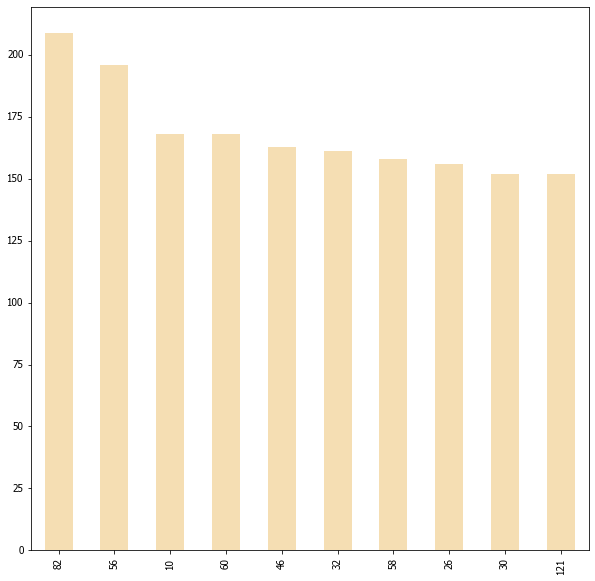

In [54]:
a=a[a["Sale"]==True]
a
a["Count"].nlargest(10).plot(kind="bar",color="wheat")

Most Data lie At Age <b>55 to 65</b>

<h4>Histograms of All The Columns</h4>

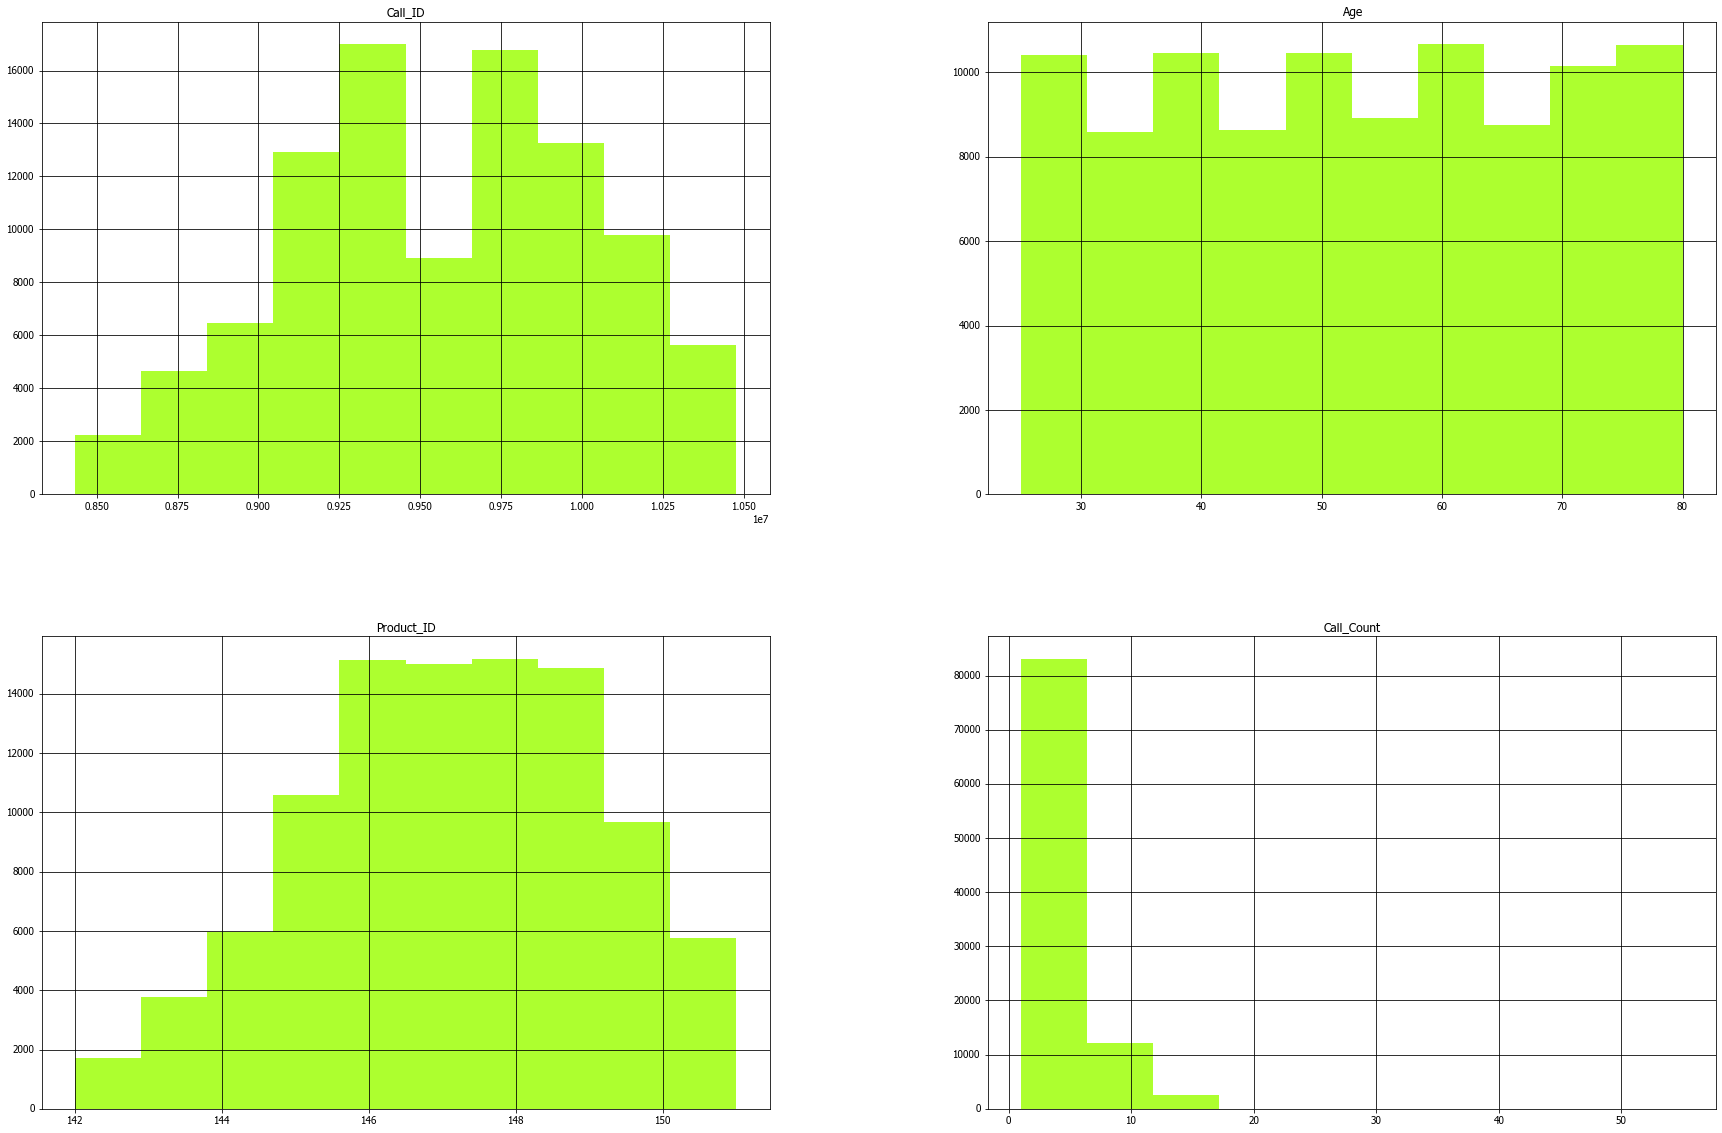

In [476]:
df.hist(bins=10,color='greenyellow',figsize=(30,20));

Here We can Tell That Product_ID <b>146 & 148</b> are most Frequent

<h4>We Can Plot Top 10 Age number From Data Which are called Frequently</h4>

Text(0, 0.5, 'count')

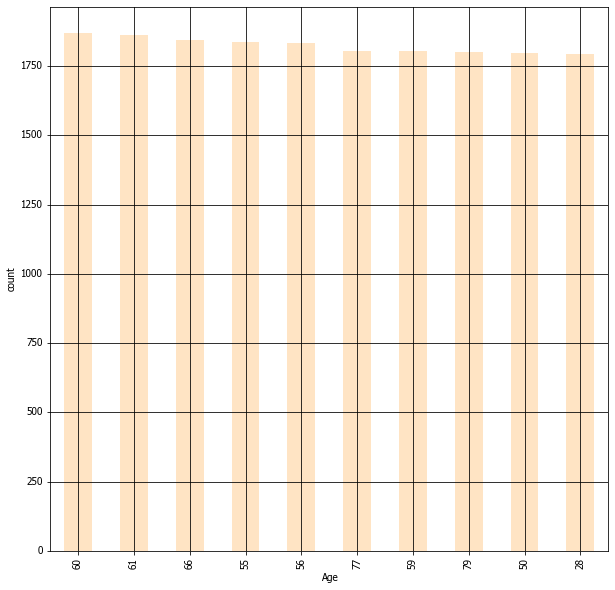

In [477]:
df["Age"].value_counts().nlargest(10).plot(kind="bar",grid=True,color="bisque")
plt.xlabel("Age")
plt.ylabel("count")

In [478]:
df.columns

Index(['Call_ID', 'Sale', 'Agent_ID', 'Age', 'Product_ID', 'Area_Code',
       'Gender', 'Call_Count'],
      dtype='object')

<h2>Countplots<h/2>

<h4>Countplot for Sale</h4>

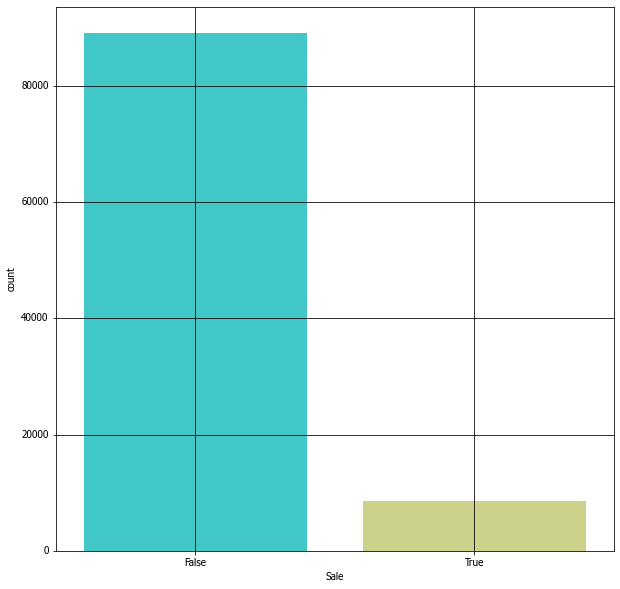

In [495]:
# df["Sale"].value_counts().plot(kind='bar',color='thistle',grid=True)
# plt.grid(color="darkcyan")
# plt.xticks(rotation=0)
# plt.xlabel("Sale")
# plt.ylabel("Frequency")
sns.countplot(data=df,x="Sale",palette="rainbow")
plt.grid()

Most Count of Data Falls in <b>False more than 93000</b>  and <b>some data in True </b>

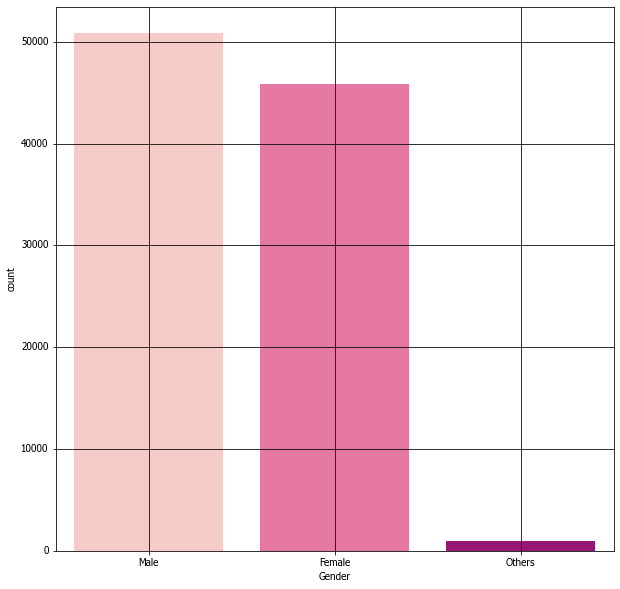

In [480]:
sns.countplot(data=df,x="Gender",palette="RdPu")
plt.grid()

<h4>Heatmap of Data</h4>

In [481]:
df.corr()

,Call_ID,Sale,Age,Product_ID,Call_Count
Call_ID,1.000000,0.016290,0.001198,0.991761,-0.411014
Sale,0.016290,1.000000,-0.002804,0.016045,-0.047259
Age,0.001198,-0.002804,1.000000,0.001304,-0.003297
Product_ID,0.991761,0.016045,0.001304,1.000000,-0.405940
Call_Count,-0.411014,-0.047259,-0.003297,-0.405940,1.000000


<AxesSubplot:>

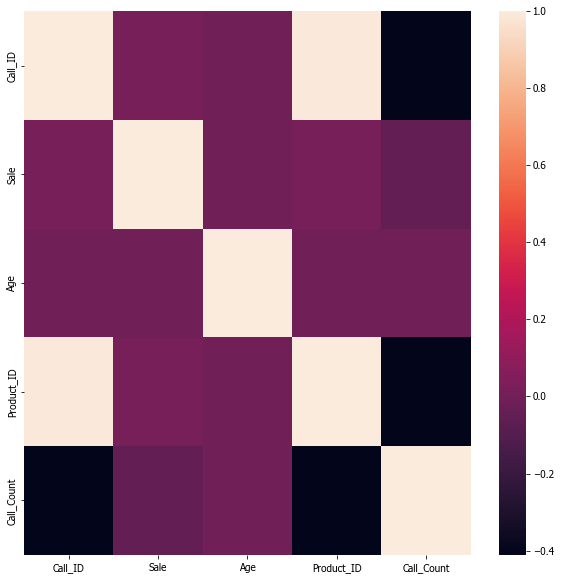

In [482]:
sns.heatmap(df.corr())

Here We Can Tell That There is <b>No Corelation</b> Between Data Columns

<h2>Bievariate Analysis</h2>

<h4>Pie Chart of Product_ID and Call_count</h4>

In [483]:
df["Product_ID"].unique()

array([147, 146, 144, 149, 150, 151, 145, 143, 148, 142], dtype=int64)

In [484]:
df.groupby(["Product_ID"])["Call_Count"].sum()

Product_ID
142    13426
143    26148
144    33489
145    44167
146    43107
147    46868
148    51500
149    34874
150    17713
151     8486
Name: Call_Count, dtype: int64

Text(0, 0.5, 'Count')

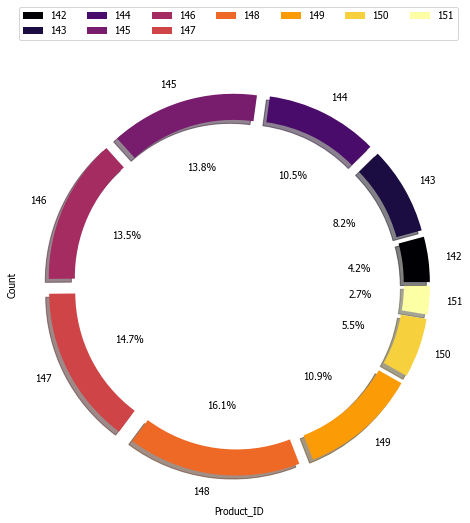

In [500]:
df.groupby(["Product_ID"])["Call_Count"].sum().plot(kind="pie",cmap="inferno",wedgeprops=dict(width=.15),explode=np.ones(10)/10,autopct="%3.1f%%",figsize=(10,8),shadow=True)
plt.grid(color="darkred")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.15), ncol=7)
plt.xlabel("Product_ID")
plt.ylabel("Count")

Bar Chart For <b>Gender And sum of Call_Count</b>

Text(0, 0.5, 'Call_Count')

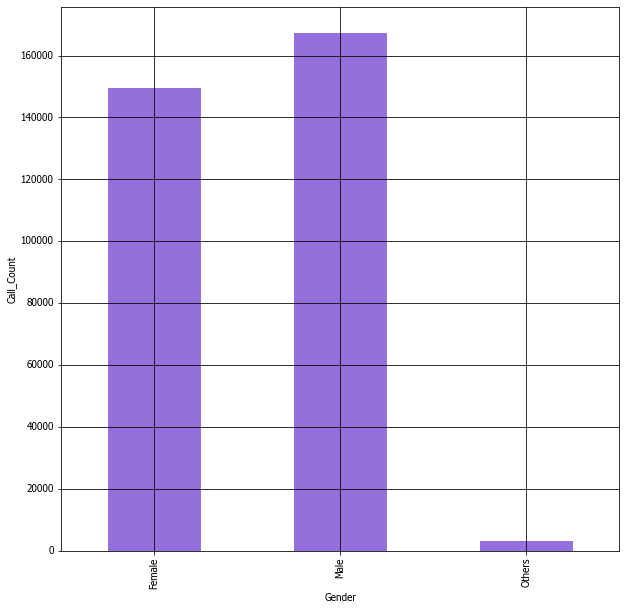

In [498]:
df.groupby(["Gender"])["Call_Count"].sum().plot(kind="bar",color="mediumpurple",grid=True)
plt.ylabel("Call_Count")

Sum of Call Count is <b>most in Male</b>

Boxplot of bar <b>Gender And Call_Count</b>

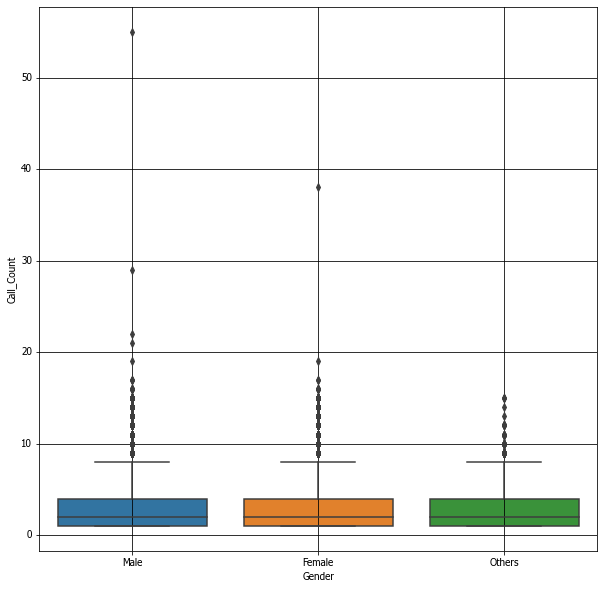

In [494]:
# df.groupby(["Gender"])["Call_Count"].sum().plot(kind="box",x="Gender",y="Call_Count")
sns.boxplot(data=df,x="Gender",y="Call_Count")
plt.grid()

Most Call Count is In Male And also Have <b>Outlier</b> which is about 58

<h2>Mulivariate Analysis</h2>

<h4>Graphs Shows Call numbers for Different Genders</h4>

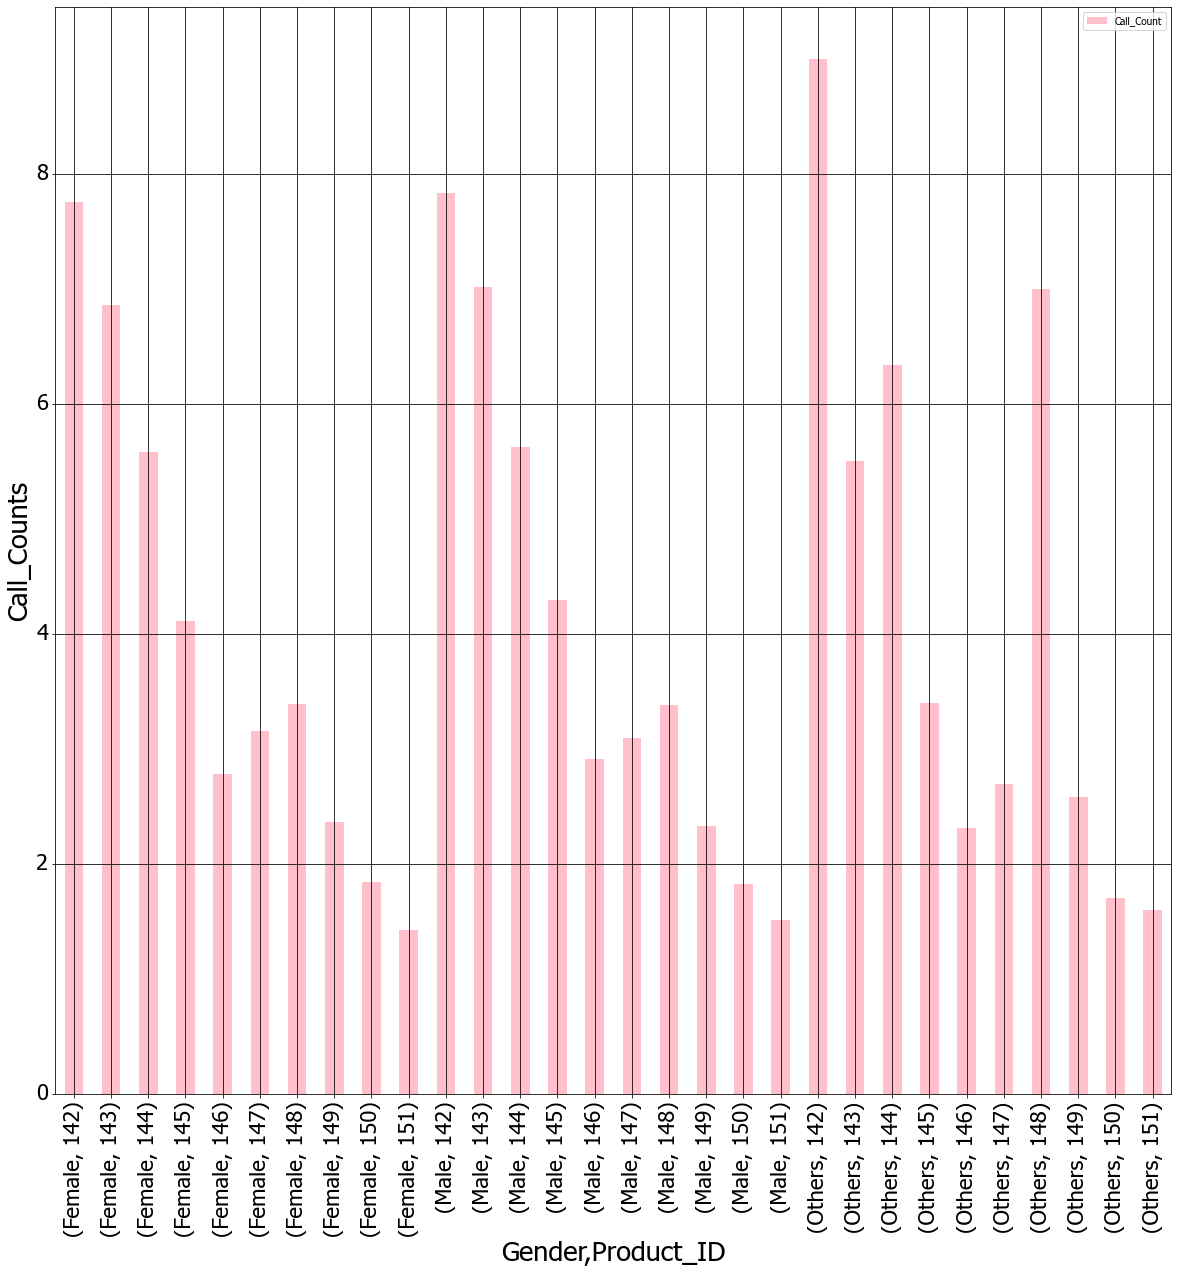

In [490]:
pd.pivot_table(data=df,index=["Gender","Product_ID"],values="Call_Count").plot(kind="bar",color="pink",figsize=(20,20))
plt.xlabel("Gender,Product_ID",fontsize=27)
plt.ylabel("Call_Counts",fontsize=27)
plt.xticks(fontsize=22,rotation=90)
plt.yticks(fontsize=22)
plt.grid();

Most Number of Calls is In <b>Other For Product Id 142</b>